<a href="https://colab.research.google.com/github/MurtazaMister/ML/blob/master/ML_Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task-1: Weather Dataset

In [33]:
from sklearn import preprocessing
from sklearn import tree

In [34]:
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [35]:
le = preprocessing.LabelEncoder()

# Converting string labels into numbers
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outlook mapping: ",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping: ",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outlook mapping:  {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping:  {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [36]:
import numpy as np
import torch

inputs = []
output = []

for i in range(len(Play_encoded)):
  temp = [Outlook_encoded[i], Temperature_encoded[i], Humidity_encoded[i], Wind_encoded[i]]
  output.append(Play_encoded[i])
  inputs.append(temp)

inputs = np.array(inputs)
inputs, output

(array([[1, 1, 0, 0],
        [1, 1, 0, 1],
        [0, 1, 0, 0],
        [2, 2, 0, 0],
        [2, 0, 1, 0],
        [2, 0, 1, 1],
        [0, 0, 1, 1],
        [1, 2, 0, 0],
        [1, 0, 1, 0],
        [2, 2, 1, 0],
        [1, 2, 1, 1],
        [0, 2, 0, 1],
        [0, 1, 1, 0],
        [2, 2, 0, 1]]), [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [43]:
from sklearn.model_selection import train_test_split

data_feature_names = ['Outlook','Temperature','Humidity', 'Wind']

X_train, X_test, y_train, y_test = train_test_split(inputs, output, train_size = 0.9)

In [44]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

from sklearn import metrics

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1 score:",metrics.f1_score(y_test,y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


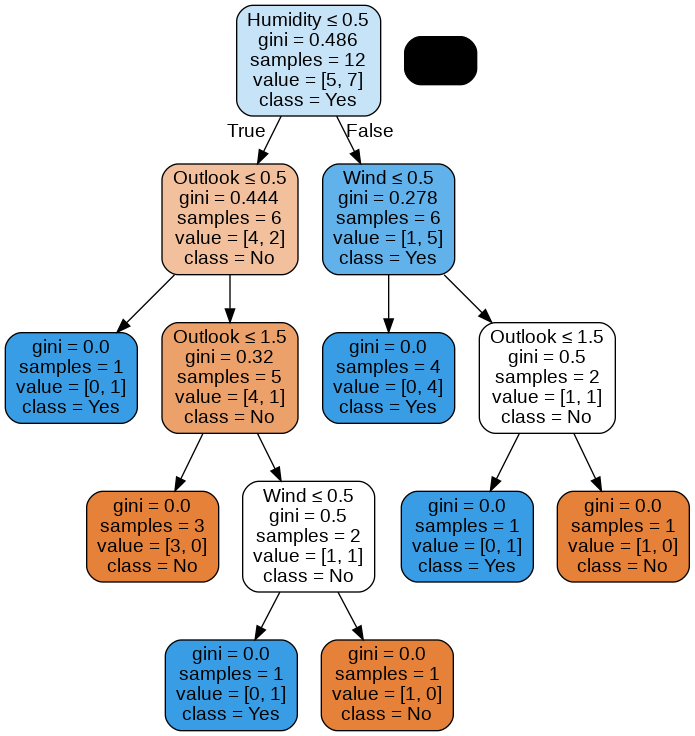

In [46]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['Outlook','Temperature','Humidity', 'Wind'],class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('weather.png')
Image(graph.create_png())

In [53]:
prediction = clf.predict([[1,2,1,0],[2,0,0,1]])

print("What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?\nAns - ", prediction[0] and 'Yes\n' or 'No\n')
print("What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?\nAns - ", prediction[1] and 'Yes' or 'No')

What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?
Ans -  Yes

What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?
Ans -  No


# Applying decision tree learning on Iris dataset

In [ ]:
from sklearn.datasets import load_iris
iris= load_iris()

X = iris.data
y = iris.target

X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [ ]:
from sklearn.model_selection import train_test_split

data_feature_names = iris.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6)

In [ ]:
clf = tree.DecisionTreeClassifier() # max_depth=3, random_state=34
clf = clf.fit(X_train, y_train)

from sklearn import metrics

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred,average='micro'))
print("Recall:",metrics.recall_score(y_test,y_pred,average='micro'))
print("F1 score:",metrics.f1_score(y_test,y_pred,average='micro'))

Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 score: 0.9500000000000001


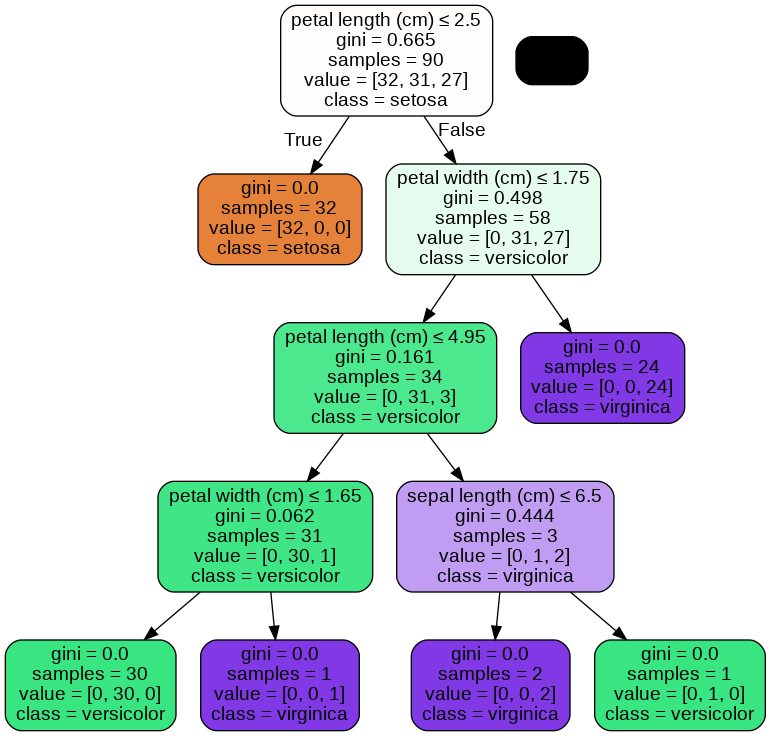

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_feature_names,class_names=['setosa','versicolor','virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())

#Task-2 : Breast Cancer Wisconsin dataset

In [12]:
import sklearn
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target
X, y, cancer.feature_names, cancer.target_names

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [26]:
from sklearn.model_selection import train_test_split

data_feature_names = cancer.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6)

In [31]:
from sklearn import preprocessing
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state = 71, max_depth=4, max_leaf_nodes = 71)
clf = clf.fit(X_train, y_train)

from sklearn import metrics

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred,average='micro'))
print("Recall:",metrics.recall_score(y_test,y_pred,average='micro'))
print("F1 score:",metrics.f1_score(y_test,y_pred,average='micro'))

Accuracy: 0.9342105263157895
Precision: 0.9342105263157895
Recall: 0.9342105263157895
F1 score: 0.9342105263157895


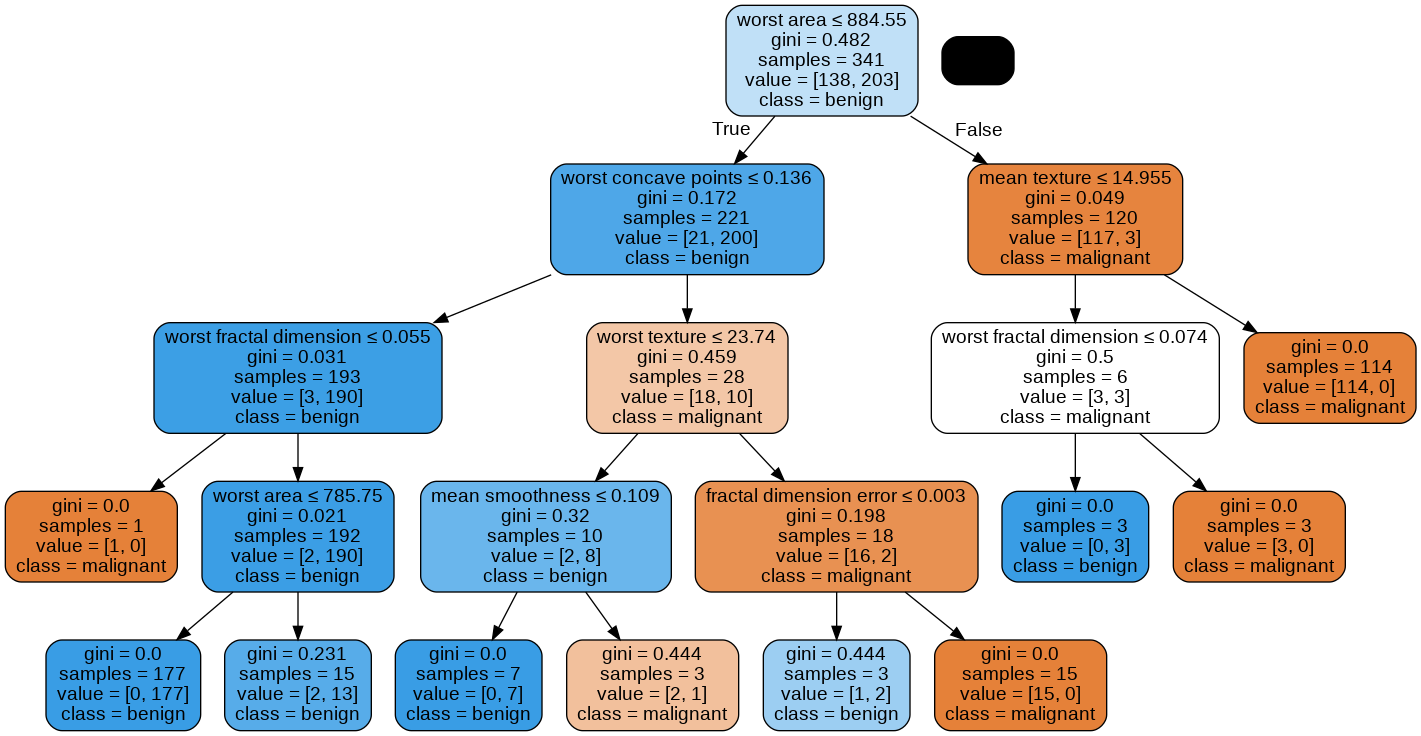

In [32]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_feature_names,class_names=['malignant','benign'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cancer.png')
Image(graph.create_png())